In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv("natural-disaster-risk-by-country-2024.csv")

In [4]:
europe = pd.read_excel(r"C:\\Users\\gusta\\GitHub\\Data501_Project\\European Countries.xlsx")

In [5]:
disaster_risk_world_index = europe.merge(df, left_on="Country", right_on="country", how="left")\
                    .drop(columns=[
                        'country', 
                        'Subregion', 
                        'Population', 
                        'European Union Association',
                        'NaturalDisasterRiskWorldRiskIndexTotal2023'
                        ])\
                    .rename(columns={
                        'NaturalDisasterRiskExposure': '2023_WPR_ND_Risk_Exposure',
                        'NaturalDisasterRiskVulnerablity': '2023_WPR_ND_Risk_Vulnerability',
                        'NaturalDisasterRiskSusceptibility': '2023_WPR_ND_Risk_Susceptibility',
                        'NaturalDisasterRiskLackOfAdaptiveCapacities': '2023_WPR_ND_Lack_Adaptive_Capacities',
                        'NaturalDisasterRiskLackOfCopingCapacities': '2023_WPR_ND_Lack_Coping_Capacities'
                    })

In [6]:
# Quick bar graphs of all of these two get an idea on what the top countries are
disaster_risk_world_index

,Country,2023_WPR_ND_Risk_Exposure,2023_WPR_ND_Risk_Vulnerability,2023_WPR_ND_Risk_Susceptibility,2023_WPR_ND_Lack_Adaptive_Capacities,2023_WPR_ND_Lack_Coping_Capacities
0,Albania,2.29,16.95,11.51,37.51,11.28
1,Austria,0.15,8.84,4.44,19.53,7.98
2,Belarus,0.05,11.14,6.49,36.57,5.83
3,Belgium,1.84,18.49,8.03,28.91,27.21
4,Bosnia and Herzegovina,0.34,20.28,14.13,51.26,11.51
5,Bulgaria,0.30,19.15,17.48,46.46,8.65
6,Croatia,1.57,14.48,8.54,37.03,9.60
7,Cyprus,1.02,12.43,7.26,35.48,7.45
8,Czechia,NaN,NaN,NaN,NaN,NaN
9,Denmark,0.18,5.42,3.47,28.66,1.60


In [7]:
vars = [
    # 'NaturalDisasterRiskWorldRiskIndexTotal2023', 
    'NaturalDisasterRiskExposure', 
    'NaturalDisasterRiskVulnerablity',
    'NaturalDisasterRiskSusceptibility', 
    'NaturalDisasterRiskLackOfAdaptiveCapacities',
    'NaturalDisasterRiskLackOfCopingCapacities'
]

In [8]:
new_labels = [
    '2023_WPR_ND_Risk_Exposure',
    '2023_WPR_ND_Risk_Vulnerability',
    '2023_WPR_ND_Risk_Susceptibility',
    '2023_WPR_ND_Lack_Adaptive_Capacities',
    '2023_WPR_ND_Lack_Coping_Capacities'
]

Risk Exposure: This category measures the degree to which a country or region is exposed to natural hazards such as earthquakes, storms, floods, droughts, and sea-level rise. High exposure means that the country frequently experiences natural events that could potentially lead to disasters.

Risk Vulnerability: Vulnerability refers to the conditions determined by physical, social, economic, and environmental factors or processes, which increase the susceptibility of a community to the impact of hazards. It essentially measures how susceptible a population is to the damage caused by these events, based on factors like infrastructure quality, poverty levels, and the preparedness of the emergency services.

Risk Susceptibility: This subcategory specifically focuses on the likelihood that exposure to hazards will result in significant negative impacts. It may consider factors such as population density in hazard-prone areas, the economic importance of areas at risk, and the resilience of built environments.

Lack of Coping Capacities: This measures the ability of a country to manage and mitigate the impacts of natural hazard events through immediate response and recovery efforts. It encompasses aspects like emergency response mechanisms, healthcare services, and social support systems. A higher score in this category indicates a greater lack of coping capacities, meaning that the country is less capable of effectively managing disasters.

Lack of Adaptive Capacities: This evaluates the long-term strategies and policies in place to adapt to the risks posed by natural hazards. It includes considerations of infrastructure adaptation, environmental management, and sustainable development plans. High scores here indicate a significant deficiency in a country's ability to adapt to changing risk landscapes, thereby increasing its long-term vulnerability to disasters.

In [9]:
# Function from https://www.geeksforgeeks.org/python-split-camelcase-string-to-individual-strings/
# Edited to return one string rather than a list of strings
import re
 
def camel_case_split(str):
    return ' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

In [10]:
# Create a 1D heatmap for each country, where the country is on the x-axis
countries = disaster_risk_world_index['Country']

# Define a custom colormap
colors = [(0, 1, 0), (1, 0, 0)]  # G -> R
n_bins = 100
cmap_name = 'my_list'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

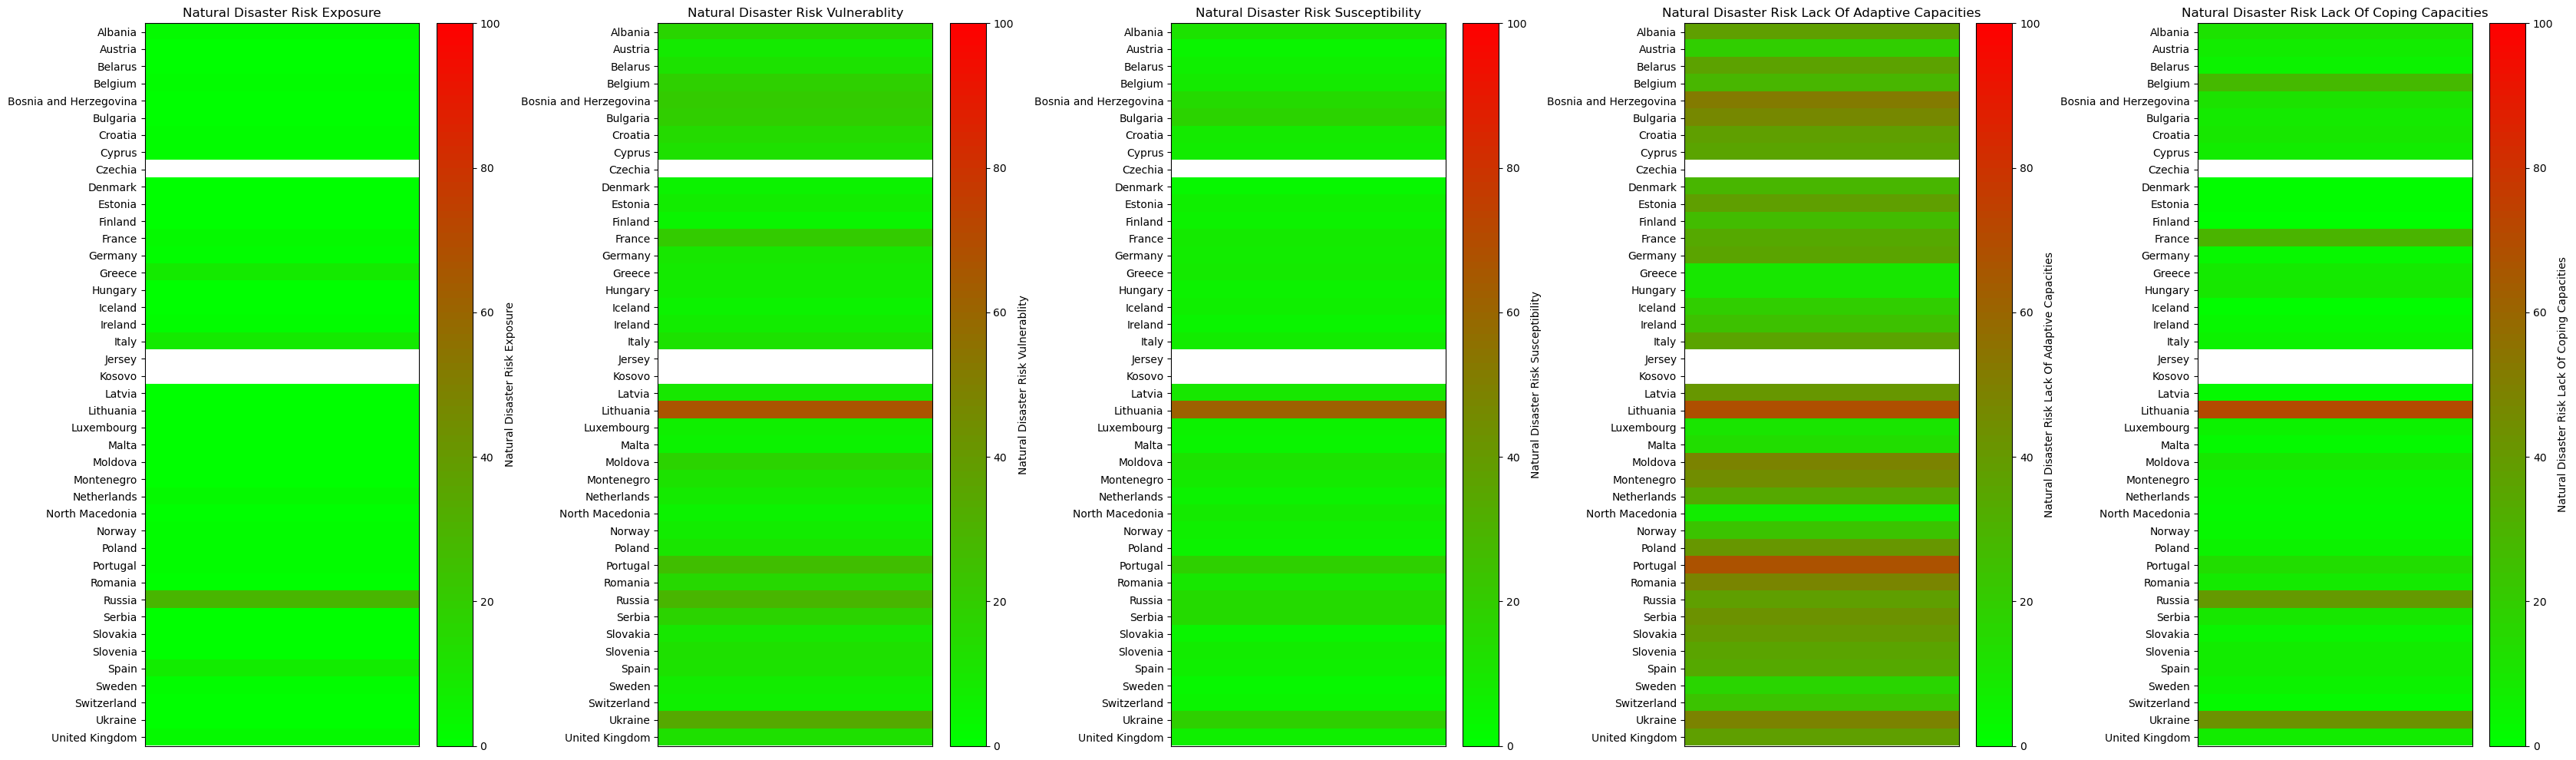

In [11]:
fig, axes = plt.subplots(1, 6, figsize=(40, 10)) 
axes = axes.flatten()

for (i, var), new_label in zip(enumerate(vars), new_labels):
    risk_score = disaster_risk_world_index[new_label]
    hm_data = np.array([risk_score]).T  # Look at each country as an independent row

    # Plotting on the ith subplot
    im = axes[i].imshow(hm_data, cmap=cm, aspect='auto', vmin=0, vmax=100, extent=[0, 1, 0, len(countries)])
    fig.colorbar(im, ax=axes[i], label=camel_case_split(var))  # Add a colorbar to the ith subplot

    # Setting the y-ticks to correspond to countries, in reversed order due to transpose
    axes[i].set_yticks(np.arange(len(countries)) + 0.5)
    axes[i].set_yticklabels(countries[::-1])

    # Removing x-ticks as they don't represent any variable in this orientation
    axes[i].set_xticks([])

    axes[i].set_title(camel_case_split(var)) 

fig.delaxes(axes[-1])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [12]:
disaster_risk_world_index.to_csv("2023_WPR_Natural_Disaster_Index_Europe.csv", index=False)